In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import math
import os.path

import keras
import sklearn
import seaborn
import pandas
import numpy
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test, report, stm32convert, stats, models


Using TensorFlow backend.


In [4]:
data = urbansound8k.load_dataset()
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


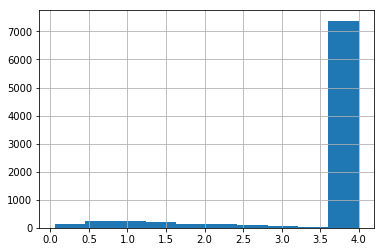

In [157]:
(data.end - data.start).hist()

In [36]:
s = {
    'model': 'strided',
    'frames': 31,
    'n_mels': 60,
    'samplerate': 22050,
    'conv_size': (3,3),
    'conv_block': 'effnet',
    'downsample_size': (2,2),
    'n_stages': 3,
    'n_blocks_per_stage': 1,
    'filters': 20,
}
model = models.build(s)
ss, ll = stats.check_model_constraints(model)
ss

{'maccs_frame': 377194,
 'flash_usage': 375010.0,
 'ram_usage_max': 56250.0,
 'ram_usage_min': 56250.0}

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 60, 31, 1)         0         
_________________________________________________________________
conv0pw (Conv2D)             (None, 30, 16, 10)        10        
_________________________________________________________________
conv0pw_bn (BatchNormalizati (None, 30, 16, 10)        40        
_________________________________________________________________
conv0pw_relu (Activation)    (None, 30, 16, 10)        0         
_________________________________________________________________
conv0dwv (DepthwiseConv2D)   (None, 30, 16, 10)        30        
_________________________________________________________________
conv0dwv_bn (BatchNormalizat (None, 30, 16, 10)        40        
_________________________________________________________________
conv0dwv_relu (Activation)   (None, 30, 16, 10)        0         
__________

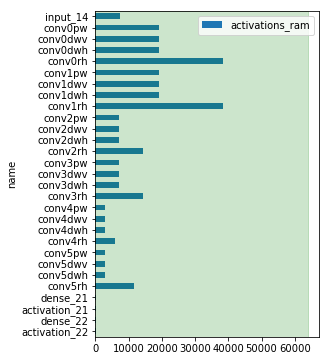

In [34]:
def plot_layers_ram(layers_ram, ax=None, max_ram=64e3):
    
    if not ax:
        fig, ax = plt.subplots(1, figsize=(4, 6))
    
    l = layers_ram.sort_index(ascending=False)
    l['activations_ram'] = 4 * l.activations
    l = l[l.activations_ram.notna()]
    l.plot(kind='barh', ax=ax, y='activations_ram', x='name')
    ax.axvspan(xmin=0, xmax=max_ram, alpha=0.2, color='green')
    
    return fig
    
plot_layers_ram(ll);


In [28]:
model.layers[0].get_output_shape_at(0)

(None, 60, 31, 1)

In [ ]:
# TODO: calculate per-class accuracy. For each fold
# TODO: compare single-frame accuracy (from training) versus voted accuracy
# TODO: compare no-overlap, 50% overlap and 10% overlap